# Evaluation 

## methods: SVM, logistic
## number of iterations: 3
## number of sets: 2 (train / test)

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import glob

In [81]:
methods = 'svm', 'logistic'
iterations = range(1, 4)
sets = range(1, 3)
output_directory_name = '{method}_set{set_a}_iteration{iteration}'
csv_filename = 'set{set_a}_iteration{iteration}.csv'
dn_output_base = '../output/out'

In [82]:
ls ../output/out

logistic_set1_iteration1/  set1_iteration2.csv   set2_iterations3.csv
logistic_set1_iteration2/  set1_iteration3.csv   svm_set1_iteration1/
logistic_set1_iteration3/  set2_iteration1.csv   svm_set1_iteration2/
logistic_set2_iteration1/  set2_iteration2.csv   svm_set1_iteration3/
logistic_set2_iteration2/  set2_iteration3.csv   svm_set2_iteration1/
logistic_set2_iteration3/  set2_iterations1.csv  svm_set2_iteration2/
set1_iteration1.csv        set2_iterations2.csv  svm_set2_iteration3/


In [83]:
def read_vector(filename, exclude_rows=0, func_type=float):
    with open(filename) as f:
        lst = f.readlines()
    return [func_type(line.strip()) for line in lst[exclude_rows:]]

# Accuracy

In [84]:
accuracy = [[[[] for tmp1 in methods] for tmp2 in sets] for tmp3 in iterations]
for iteration in iterations:
    for set_a in sets:
        fn_csv = os.path.join(dn_output_base, csv_filename.format(set_a=set_a, iteration=iteration))
        
        for i, method in enumerate(methods):
            dn_out = os.path.join(dn_output_base,
                    output_directory_name.format(method=method, set_a=set_a, iteration=iteration))
            #fn_predict = os.path.join(dn_out, '%s_Predictions.csv' % method)
            fn_train_acc = os.path.join(dn_out, '%s_TrainAcc.csv' % method)
            fn_test_acc = os.path.join(dn_out, '%s_TestAcc.csv' % method)
            
            accuracy[iteration-1][set_a-1][i].append(read_vector(fn_train_acc)[0])
            accuracy[iteration-1][set_a-1][i].append(read_vector(fn_test_acc)[0])
accuracy = np.array(accuracy)

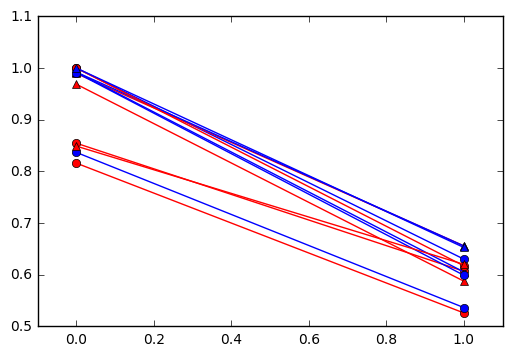

In [85]:
colors = ['r', 'b']
fmts = ['o-', '^-']

for iteration in iterations:
    for set_a in sets:
        for i in range(len(methods)):
            plt.plot([0, 1], accuracy[iteration-1, set_a-1, i, :], fmts[set_a-1], color=colors[i])
_ = plt.axis([-0.1, 1.1, 0.5, 1.1])

# Reproducibility

In [86]:
weights = [ [] for method in methods ]
for i, method in enumerate(methods):
    for iteration in iterations:
        for set_a in sets:
            dn_out = os.path.join(dn_output_base,
                    output_directory_name.format(method=method, set_a=set_a, iteration=iteration))
            fn_model = os.path.join(dn_out, '%s_Weights.csv' % method)
            weights[i].append(read_vector(fn_model))

In [87]:
corrs = [np.corrcoef(model) for model in weights]

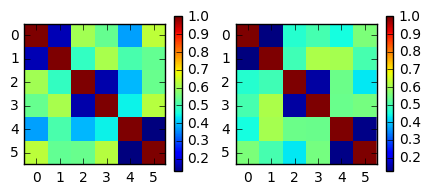

In [88]:
fig, subs = plt.subplots(nrows=1, ncols=len(methods), figsize=(5,2))
for i in range(len(methods)):
    plt.subplot(subs[i])
    plt.imshow(corrs[i], interpolation='none')
    plt.colorbar()

In [89]:
corrs

[array([[ 1.        ,  0.17252353,  0.60536783,  0.54070946,  0.37418505,
          0.63531669],
        [ 0.17252353,  1.        ,  0.48853246,  0.61331772,  0.511974  ,
          0.53900908],
        [ 0.60536783,  0.48853246,  1.        ,  0.16432677,  0.39421021,
          0.54483038],
        [ 0.54070946,  0.61331772,  0.16432677,  1.        ,  0.44738886,
          0.62772364],
        [ 0.37418505,  0.511974  ,  0.39421021,  0.44738886,  1.        ,
          0.12830193],
        [ 0.63531669,  0.53900908,  0.54483038,  0.62772364,  0.12830193,
          1.        ]]),
 array([[ 1.        ,  0.12108547,  0.46900184,  0.50225497,  0.45300035,
          0.56281025],
        [ 0.12108547,  1.        ,  0.49800371,  0.61340471,  0.60576197,
          0.50370721],
        [ 0.46900184,  0.49800371,  1.        ,  0.1487407 ,  0.54601348,
          0.43083028],
        [ 0.50225497,  0.61340471,  0.1487407 ,  1.        ,  0.54294712,
          0.55443148],
        [ 0.45300035,  0.605

In [90]:
fn_nif1 = os.path.join(dn_output_base,
        output_directory_name.format(method='svm', set_a=1, iteration=1),
        'svm_Weights.nii.gz')

In [91]:
import nibabel as nib

In [92]:
from nilearn import plotting

In [93]:
img1 = nib.load(fn_nif1)

In [94]:
img2 = nib.load(fn_nif2)

In [95]:
fn_nif2 = os.path.join(dn_output_base,
        output_directory_name.format(method='svm', set_a=2, iteration=1),
        'svm_Weights.nii.gz')

# Compare Weight Maps from Different Sets

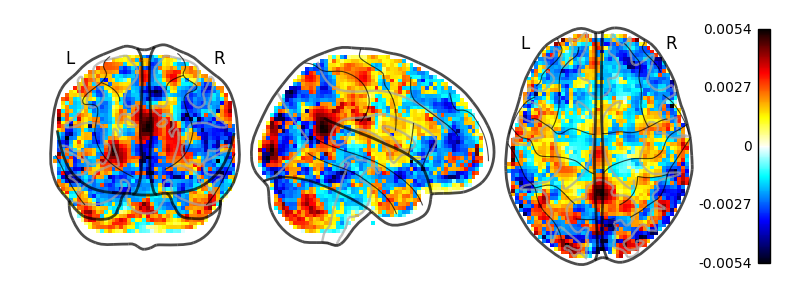

In [96]:
plotting.plot_glass_brain(img1,colorbar=True,plot_abs=False)

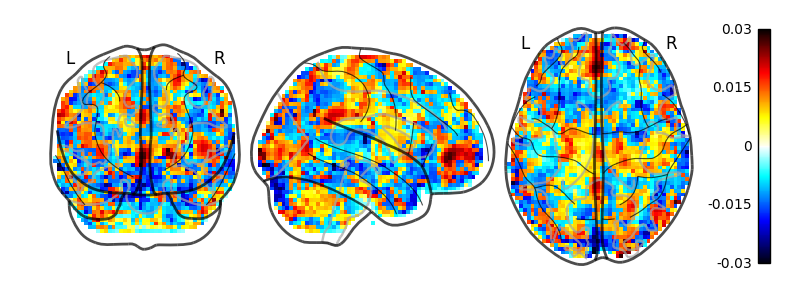

In [97]:
plotting.plot_glass_brain(img2,colorbar=True,plot_abs=False)